In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
VERBOSE = True

# Game of Blackjack

In [3]:
#Choose stick(1) or hit(0)
def get_action(num_sum):
    if num_sum > 21:
        return 1
    return np.random.binomial(1, num_sum/21, 1)[0]

#Get a new card
def get_card():
    #Ace is considered as 1 & 10, J, Q, K are considerded as 10
    p = np.array([0.077, 0.077,0.077,0.077,0.077,0.077,0.077,0.077,0.077,0.30])/np.sum([0.077, 0.077,0.077,0.077,0.077,0.077,0.077,0.077,0.077,0.30])
    return np.random.choice([1,2,3,4,5,6,7,8,9,10],p= p)

In [4]:
# n: number of episodes
# returns a list of lists of length n where each sub list is an episode 
def generate_episodes(n, verbose=False):
    episodes = []
    idx = 0
    while idx<n:
        idx+=1
        dealer = [get_card()]
        player = [0]
        player_sum=0
        dealer_sum=dealer[0]
        
        #Player is playing
        action = get_action(player_sum)
        player.append(action)
        
        while action!=1 and player_sum<=21:
            player.append(0)
            curr_card = get_card()
            if verbose:
                print("Player:", "Card choosen=", curr_card)
            player_sum+=curr_card
            player.append(player_sum)
            action = get_action(player_sum)
            player.append(action)
            
        #Dealer is playing
        action = get_action(dealer_sum)
        dealer.append(action)
        
        if player_sum<=21:
            while action!=1 and dealer_sum<=21:
                dealer.append(0)
                curr_card = get_card()
                if verbose:
                    print("Dealer:", "Card choosen=", curr_card)
                dealer_sum+=curr_card
                dealer.append(dealer_sum)
                action = get_action(dealer_sum)
                dealer.append(action)
        
        if verbose:
            print("Player Sum:", player_sum, "Dealer Sum:", dealer_sum)
        
        if (player_sum<=21 and player_sum == dealer_sum):
            player.append(0)
            dealer.append(0)
        elif (player_sum > dealer_sum and player_sum <= 21) or (player_sum <= 21 and dealer_sum > 21):
            player.append(1)
            dealer.append(-1)
        else:
            player.append(-1)
            dealer.append(1)
        
        episodes.append(player)
        episodes.append(dealer)
    return episodes

In [12]:
episodes = generate_episodes(5000)

### Monte Carlo

In [13]:
R = {}
Q = np.zeros((52,2))
Policy = [-1 for i in range(52)]

for episode in episodes:
    states = []
    for i in range(0, len(episode),3):
        state = episode[i]
        action = episode[i+1]
        reward = episode[i+2]
        
        states.append(state)
        
        R[(state,action)] = R.get((state,action),[])
        R[(state,action)].append(episode[-1])
        Q[state][action] = np.mean(R[(state,action)])
        
    #Policy Control
    for state in states:
        Policy[state] = np.argmax(Q[state])

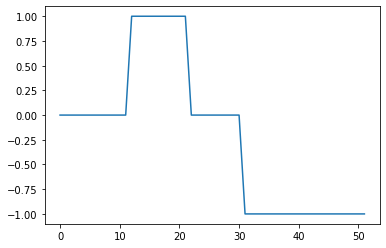

In [14]:
plt.plot(Policy)

In [16]:
Q[:22]

array([[ 0.0024    ,  0.        ],
       [ 0.02455662, -1.        ],
       [ 0.06507304, -0.73333333],
       [ 0.03862069, -0.9       ],
       [ 0.06842105, -0.80434783],
       [ 0.08310249, -0.73221757],
       [ 0.15365239, -0.72631579],
       [ 0.18396846, -0.63428571],
       [ 0.2356091 , -0.55868545],
       [ 0.34557823, -0.44043321],
       [ 0.44871795, -0.20145631],
       [ 0.52061856, -0.07542579],
       [-0.04012346,  0.05263158],
       [-0.09854015,  0.15904139],
       [-0.08130081,  0.21363636],
       [-0.30493274,  0.2687747 ],
       [-0.43209877,  0.49083503],
       [-0.51260504,  0.50943396],
       [-0.63333333,  0.62195122],
       [-0.90243902,  0.79281184],
       [-0.68      ,  0.88536953],
       [ 0.        ,  0.94570136]])

In [22]:
for key in sorted(R.keys(),key=lambda x:str(x[0])+'_'+str(x[1])):
    print(key, np.mean(R[key]))

(0, 0) 0.0024
(10, 0) 0.44871794871794873
(10, 1) -0.20145631067961164
(11, 0) 0.520618556701031
(11, 1) -0.07542579075425791
(12, 0) -0.040123456790123455
(12, 1) 0.05263157894736842
(13, 0) -0.09854014598540146
(13, 1) 0.15904139433551198
(14, 0) -0.08130081300813008
(14, 1) 0.21363636363636362
(15, 0) -0.30493273542600896
(15, 1) 0.26877470355731226
(16, 0) -0.43209876543209874
(16, 1) 0.4908350305498982
(17, 0) -0.5126050420168067
(17, 1) 0.5094339622641509
(18, 0) -0.6333333333333333
(18, 1) 0.6219512195121951
(19, 0) -0.9024390243902439
(19, 1) 0.7928118393234672
(1, 0) 0.02455661664392906
(1, 1) -1.0
(20, 0) -0.68
(20, 1) 0.8853695324283559
(21, 1) 0.9457013574660633
(22, 1) -1.0
(23, 1) -1.0
(24, 1) -1.0
(25, 1) -1.0
(26, 1) -1.0
(27, 1) -1.0
(28, 1) -1.0
(29, 1) -1.0
(2, 0) 0.0650730411686587
(2, 1) -0.7333333333333333
(30, 1) -1.0
(3, 0) 0.038620689655172416
(3, 1) -0.9
(4, 0) 0.06842105263157895
(4, 1) -0.8043478260869565
(5, 0) 0.08310249307479224
(5, 1) -0.7322175732217573

## Exploring Starts

In [73]:
verbose = 0

In [74]:
def get_action(num_sum, Q):
    return np.argmax(Q[num_sum])

def get_dealer_action(num_sum):
    if num_sum > 21:
        return 1
    return np.random.binomial(1, num_sum/21, 1)[0]

def get_reward(player_sum, action):
    if action==0:
        return 0
    else:
        dealer_sum = 0
        action = get_dealer_action(dealer_sum)
        while action!=1 and dealer_sum<=21:
            curr_card = get_card()
            if verbose:
                print("Dealer:", "Card choosen=", curr_card)
            dealer_sum+=curr_card
            action = get_dealer_action(dealer_sum)
        
        if (player_sum<=21 and player_sum == dealer_sum):
            return 0
        elif (player_sum > dealer_sum and player_sum <= 21) or (player_sum <= 21 and dealer_sum > 21):
            return 1
        else:
            return -1

In [82]:
R = {}
Q = np.zeros((52,2))
Policy = [-1 for i in range(52)]

for epoch in range(10000):
    states = []
    player_sum = 0
    action = 0
    reward = 0
    states.append((player_sum, action))
    while action != 1 and player_sum <= 21:
        curr_card = get_card()
        player_sum += curr_card
        action = get_action(player_sum, Q)
        reward = get_reward(player_sum, action)
        states.append((player_sum, action))
        if verbose:
            print(player_sum, action, reward)
    reward = get_reward(player_sum, 1)
    if verbose:
        print("Final reward:", reward)
    
    for s, a in states:
        R[(s,a)] = R.get((s,a),[])
        R[(s,a)].append(reward)
        Q[s][a] = np.mean(R[(s,a)])
        
    #Policy Control
    for state, a in states:
        Policy[state] = np.argmax(Q[state])

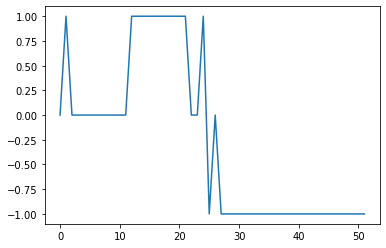

In [83]:
plt.plot(Policy)

In [84]:
for key in sorted(R.keys(),key=lambda x:str(x[1])+'_'+str(x[0])):
    print(key, np.mean(R[key]))

(0, 0) 0.3892
(1, 0) -1.0
(10, 0) 0.5671722643553629
(11, 0) 0.5768398268398268
(12, 0) -1.0
(13, 0) -1.0
(14, 0) -1.0
(15, 0) -1.0
(16, 0) -1.0
(17, 0) -1.0
(18, 0) -1.0
(19, 0) -1.0
(2, 0) 0.3797634691195795
(20, 0) -1.0
(21, 0) -1.0
(22, 0) -1.0
(23, 0) -1.0
(24, 0) -1.0
(26, 0) -1.0
(3, 0) 0.4148148148148148
(4, 0) 0.4134929270946681
(5, 0) 0.4118895966029724
(6, 0) 0.44291338582677164
(7, 0) 0.5143603133159269
(8, 0) 0.4964143426294821
(9, 0) 0.5752688172043011
(1, 1) -0.8736842105263158
(10, 1) -1.0
(11, 1) -1.0
(12, 1) 0.15674255691768826
(13, 1) 0.16905187835420393
(14, 1) 0.2857142857142857
(15, 1) 0.41876892028254287
(16, 1) 0.4617737003058104
(17, 1) 0.6168539325842697
(18, 1) 0.6640449438202247
(19, 1) 0.8170894526034713
(2, 1) -1.0
(20, 1) 0.8893690579083837
(21, 1) 0.9885057471264368
(22, 1) -1.0
(23, 1) -1.0
(26, 1) -1.0
(3, 1) -1.0
(4, 1) -1.0
(6, 1) -1.0
(7, 1) -0.5
(8, 1) -1.0
(9, 1) -1.0


In [85]:
Q[:22]

array([[ 0.3892    ,  0.        ],
       [-1.        , -0.87368421],
       [ 0.37976347, -1.        ],
       [ 0.41481481, -1.        ],
       [ 0.41349293, -1.        ],
       [ 0.4118896 ,  0.        ],
       [ 0.44291339, -1.        ],
       [ 0.51436031, -0.5       ],
       [ 0.49641434, -1.        ],
       [ 0.57526882, -1.        ],
       [ 0.56717226, -1.        ],
       [ 0.57683983, -1.        ],
       [-1.        ,  0.15674256],
       [-1.        ,  0.16905188],
       [-1.        ,  0.28571429],
       [-1.        ,  0.41876892],
       [-1.        ,  0.4617737 ],
       [-1.        ,  0.61685393],
       [-1.        ,  0.66404494],
       [-1.        ,  0.81708945],
       [-1.        ,  0.88936906],
       [-1.        ,  0.98850575]])

### Epsilon soft policy

In [88]:
verbose = 0
e = 0.1

In [91]:
def get_action(num_sum, Q):
    return np.random.choice([0,1], p = np.array(Q[num_sum])/np.sum(Q[num_sum]))

In [101]:
R = {}
Q = np.zeros((52,2))
Policy = np.zeros((52,2)) + 0.5

for epoch in range(50000):
    states = []
    player_sum = 0
    action = 0
    reward = 0
    states.append((player_sum, action))
    while action != 1 and player_sum <= 21:
        curr_card = get_card()
        player_sum += curr_card
        action = get_action(player_sum, Policy)
        reward = get_reward(player_sum, action)
        states.append((player_sum, action))
        if verbose:
            print(player_sum, action, reward)
    reward = get_reward(player_sum, 1)
    if verbose:
        print("Final reward:", reward)
    
    for s, a in states:
        R[(s,a)] = R.get((s,a),[])
        R[(s,a)].append(reward)
        Q[s][a] = np.mean(R[(s,a)])
        
    #Policy Control
    for state, a in states:
        Policy[state][a] = 1 - e - e/2
        Policy[state][1-a] = e/2

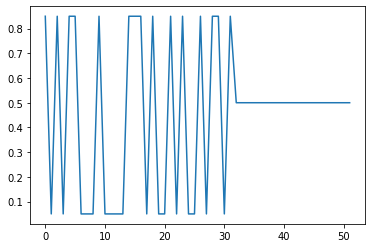

In [102]:
plt.plot(Policy.T[0])

In [103]:
for key in sorted(R.keys(),key=lambda x:str(x[1])+'_'+str(x[0])):
    print(key, np.mean(R[key]))

(0, 0) -0.33956
(1, 0) -0.26648599819331525
(10, 0) -0.0042053184910327765
(11, 0) -0.085219707057257
(12, 0) -0.3651026392961877
(13, 0) -0.4304635761589404
(14, 0) -0.51699604743083
(15, 0) -0.557427258805513
(16, 0) -0.6559485530546624
(17, 0) -0.7350993377483444
(18, 0) -0.7781484570475397
(19, 0) -0.8447528187337381
(2, 0) -0.23136872868972236
(20, 0) -0.9293439077144917
(21, 0) -1.0
(22, 0) -1.0
(23, 0) -1.0
(24, 0) -1.0
(25, 0) -1.0
(26, 0) -1.0
(27, 0) -1.0
(28, 0) -1.0
(29, 0) -1.0
(3, 0) -0.2468677494199536
(30, 0) -1.0
(31, 0) -1.0
(4, 0) -0.23083439220669208
(5, 0) -0.20336669699727025
(6, 0) -0.1267361111111111
(7, 0) -0.12472647702407003
(8, 0) -0.11688311688311688
(9, 0) -0.07501847745750184
(1, 1) -0.8517846339987901
(10, 1) -0.22021660649819494
(11, 1) 0.031426269137792104
(12, 1) 0.10242792109256449
(13, 1) 0.196513470681458
(14, 1) 0.2798165137614679
(15, 1) 0.3487261146496815
(16, 1) 0.4748427672955975
(17, 1) 0.6005612722170253
(18, 1) 0.6715517241379311
(19, 1) 0.

### Off Policy

In [23]:
verbose = 0
gamma = 0.1

In [24]:
#Choose stick(1) or hit(0)
def get_action(num_sum):
    if num_sum > 21:
        return 1
    return np.random.binomial(1, num_sum/21, 1)[0]

#Get a new card
def get_card():
    #Ace is considered as 1 & 10, J, Q, K are considerded as 10
    p = np.array([0.077, 0.077,0.077,0.077,0.077,0.077,0.077,0.077,0.077,0.30])/np.sum([0.077, 0.077,0.077,0.077,0.077,0.077,0.077,0.077,0.077,0.30])
    return np.random.choice([1,2,3,4,5,6,7,8,9,10],p= p)

In [25]:
# n: number of episodes
# returns a list of lists of length n where each sub list is an episode 
def generate_episodes(n, verbose=False):
    episodes = []
    idx = 0
    while idx<n:
        idx+=1
        dealer = [get_card()]
        player = [0]
        player_sum=0
        dealer_sum=dealer[0]
        
        #Player is playing
        action = get_action(player_sum)
        player.append(action)
        
        while action!=1 and player_sum<=21:
            player.append(0)
            curr_card = get_card()
            if verbose:
                print("Player:", "Card choosen=", curr_card)
            player_sum+=curr_card
            player.append(player_sum)
            action = get_action(player_sum)
            player.append(action)
            
        #Dealer is playing
        action = get_action(dealer_sum)
        dealer.append(action)
        
        if player_sum<=21:
            while action!=1 and dealer_sum<=21:
                dealer.append(0)
                curr_card = get_card()
                if verbose:
                    print("Dealer:", "Card choosen=", curr_card)
                dealer_sum+=curr_card
                dealer.append(dealer_sum)
                action = get_action(dealer_sum)
                dealer.append(action)
        
        if verbose:
            print("Player Sum:", player_sum, "Dealer Sum:", dealer_sum)
        
        if (player_sum<=21 and player_sum == dealer_sum):
            player.append(0)
            dealer.append(0)
        elif (player_sum > dealer_sum and player_sum <= 21) or (player_sum <= 21 and dealer_sum > 21):
            player.append(1)
            dealer.append(-1)
        else:
            player.append(-1)
            dealer.append(1)
        
        episodes.append(player)
        episodes.append(dealer)
    return episodes

In [26]:
Q = np.zeros((52,2))
C = np.zeros((52,2))
Policy = np.zeros(52)

for epoch in range(50000):
    episodes = generate_episodes(1)
    for episode in episodes:
        reward = 0
        W = 1
        for i in range(len(episode)-1,-1,-3):
            reward = gamma * reward + episode[i]
            C[episode[i-2]][episode[i-1]] += W
            Q[episode[i-2]][episode[i-1]] = Q[episode[i-2]][episode[i-1]] + (W/C[episode[i-2]][episode[i-1]]) * (reward - Q[episode[i-2]][episode[i-1]])
            Policy[episode[i-2]] = np.argmax(Q[episode[i-2]])
            if Policy[episode[i-2]] != episode[i-1]:
                break
            if episode[i-1]:
                W = (W * 21) / episode[i-2]
            else:
                W = (W * 21) / (21-episode[i-2])

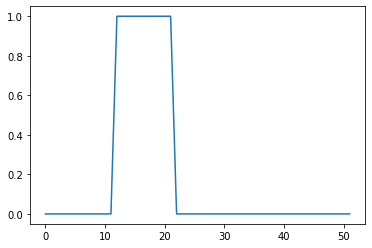

In [28]:
plt.plot(Policy)

In [30]:
Q

array([[ 0.00302065,  0.        ],
       [ 0.04196531, -0.88795518],
       [ 0.03722347, -0.84      ],
       [ 0.03874724, -0.84577922],
       [ 0.04233268, -0.79065841],
       [ 0.04478004, -0.78535354],
       [ 0.0488806 , -0.70618034],
       [ 0.05551691, -0.66290323],
       [ 0.05956472, -0.54969217],
       [ 0.06560756, -0.44885818],
       [ 0.08604558, -0.21417183],
       [ 0.0616409 , -0.05142579],
       [ 0.05487715,  0.06950922],
       [ 0.06201545,  0.13469034],
       [ 0.06538065,  0.24390244],
       [ 0.07036879,  0.365294  ],
       [ 0.08073972,  0.45413129],
       [ 0.07903468,  0.55145228],
       [ 0.0908363 ,  0.67411586],
       [ 0.08787436,  0.76188279],
       [ 0.1       ,  0.87373972],
       [ 0.        ,  0.97785349],
       [ 0.        , -1.        ],
       [ 0.        , -1.        ],
       [ 0.        , -1.        ],
       [ 0.        , -1.        ],
       [ 0.        , -1.        ],
       [ 0.        , -1.        ],
       [ 0.        ,